# Eigenfaces

## Descarga y procesamiento del dataset 

En esta etapa, buscamos y seleccionamos un dataset con un número suficiente de imágenes de caras para llevar a cabo el ejercicio. En este caso, vamos a utilizar una base de datos de Scikit-Learn que contiene un total de 13233 fotos de diferentes rostros.

In [1]:
#importamos todas las librerias necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from sklearn import decomposition,svm
from PIL import Image
import cv2

Este dataset tiene imágenes con dimenciones: 62px X 47px
Este dataset contiene un total de: 13233 imágenes


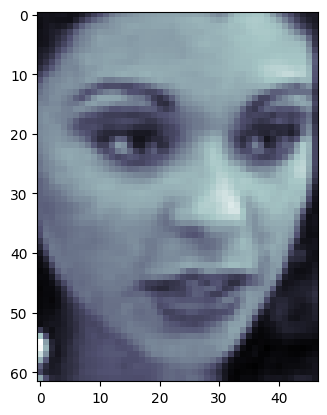

In [2]:
# Desacargamos un dataset de 200Mb
# Puede tardar un rato
faces = datasets.fetch_lfw_people()
face_dim = faces.images.shape

# Información del dataset
print('Este dataset tiene imágenes con dimenciones: {}px X {}px'.format(face_dim[1],face_dim[2]))
print('Este dataset contiene un total de: {} imágenes'.format(face_dim[0]))

# Sacamos un rostro para ver cómo reconstruir las imágenes 
# desde una matriz
data_faces = faces.data[500].reshape(62,47)
imshow(np.asarray(data_faces),cmap=plt.cm.bone);

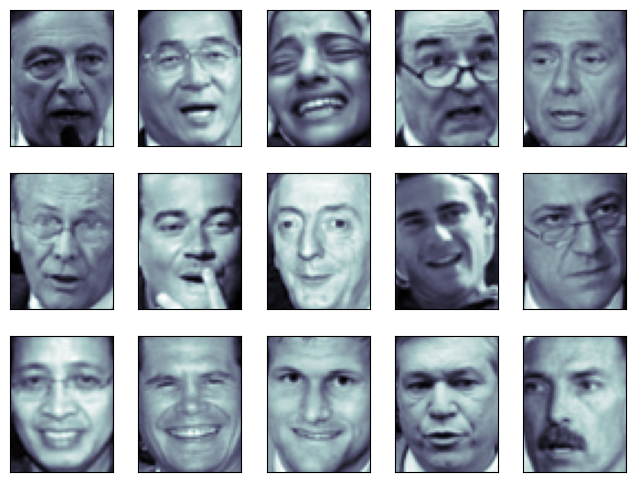

In [4]:
# Mostramos algunas imagenes de este dataset

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i+20], cmap=plt.cm.bone)
  

## Reducción de dimencionalidad usando PCA

Para este caso, vamos a utilizar PCA (Análisis de Componentes Principales), una técnica de análisis estadístico que se emplea para reducir la dimensionalidad de un conjunto de datos. El objetivo principal de PCA es identificar las características más importantes o las combinaciones lineales de características que explican la mayor varianza en los datos.

Al aplicar PCA, obtendremos una matriz que representa la base de un "Espacio Vectorial de Caras" (también conocido como "Eigenfaces"). Esto significa que con los elementos de esta matriz podemos construir cualquier rostro como una combinación lineal de dichos elementos.

Es importante destacar que, a medida que aumentamos el número de componentes principales, disminuye la pérdida de detalles al representar un rostro como una combinación lineal. Por lo tanto, después de realizar experimentos, hemos decidido utilizar 300 componentes principales en este caso específico.

In [6]:
# Creamos nuestro conjunto de entrenamiento y prueba para nuestro PCA

X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(9924, 2914) (3309, 2914)


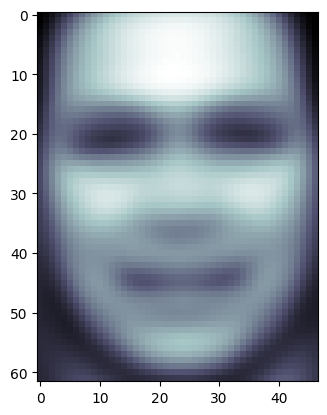

In [8]:
# Usamos PCA con nuestro dataset

pca = decomposition.PCA(n_components=300, whiten=True)
pca.fit(X_train)
plt.imshow(pca.mean_.reshape(faces.images[40].shape), cmap=plt.cm.bone)

### Algunas eigenfaces

Ahora vamos a mostrar algunos elementos de la base que acabamos de construir. En este caso, vamos a presentar las primeras 30 eigenfaces.

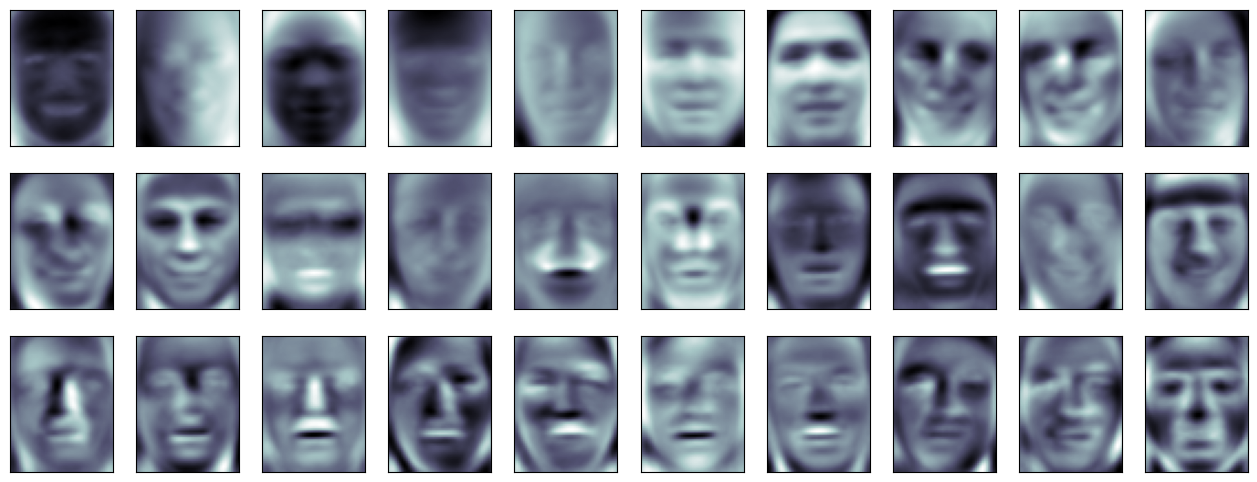

In [12]:
# Mostramos las primeras 30 eigenfaces contenidas en la matriz del PCA

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

## Rostro en termino de eigenfaces

Ahora vamos a usar una foto propia y vamos a representarla en terminos de Eigenfaces

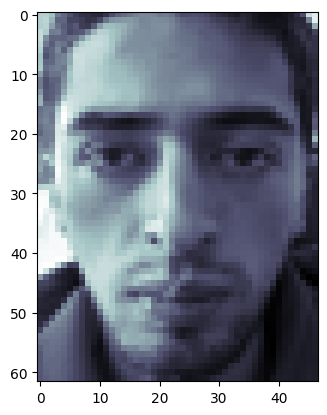

In [14]:
# Haces un pequeño preprocesado de la imágen 
image = Image.open('test.jpeg').resize((47,62))
image_numpy = cv2.cvtColor(np.asarray(image), cv2.COLOR_BGR2GRAY).flatten()

imshow(np.asarray(image_numpy.reshape(62,47)),cmap=plt.cm.bone);

En el siguiente código hacemos la proyección 

In [15]:
# Promedio de la base
mean_face = pca.mean_

# Diferencia entre el promedio de la base
# y el rostro que usamos
diff_face = image_numpy - mean_face

#Ahora hacemos la proyección del rostro en la base
projection = []
for i in range(300):
   projection.append(np.dot(diff_face, pca.components_[i]))
print('La proyección es:')
print(projection)

# Veamos qué elementos de la base tienen más peso
# en este caso sorted_base contiene un diccionario en donde el 
# las llaves son la posición de la eigenface en la base 
# y los valores son el respectivos pesos de la proyección
base_info = {i:abs(projection[i]) for i in range(0,len(projection)) }

# Ordenamos dicho diccionario y mostramos los 10 elementos que más peso tienen
sorted_base = {k: v for k, v in sorted(base_info.items(), 
                                      key=lambda item: item[1], 
                                      reverse=True)
               }

print("Las Eigenfaces con más pesos son:")
print(sorted_base)



La proyección es:
[-5645.0674, -2047.9305, 119.22549, -78.37292, 540.24506, 348.70312, 756.38336, -534.66113, -325.5283, -142.6795, -213.15149, 685.4479, 299.18454, 187.28752, 280.13538, 64.220505, 81.26377, 363.32474, -311.46014, -198.93121, -363.60794, 124.59363, -105.32234, 21.610422, 75.911896, 49.205185, -253.57361, -288.50455, -202.36604, -146.35478, -115.87388, 567.0754, 26.898348, 106.20828, 154.11594, 53.81701, -74.413795, 533.28827, 30.4289, -163.00957, -263.42938, -61.0028, -203.10858, -152.47276, 155.94753, 80.183365, -3.6625009, 49.67194, -60.57032, -148.02426, 274.0169, -150.33649, 25.964718, -192.3438, 75.65189, 56.74017, -112.169136, -265.06116, 148.20123, -107.91986, -59.991543, 15.5546, -13.841467, 10.784865, 145.58011, 52.603622, 293.9273, -24.341274, -104.2744, -12.084874, -51.36273, -234.1013, -23.334438, -107.339294, 205.43735, 325.32578, 110.68666, -36.036396, 28.58122, -147.16101, -119.70701, -145.6668, 19.412073, 181.19435, 13.017305, -62.61847, -23.004913, -12

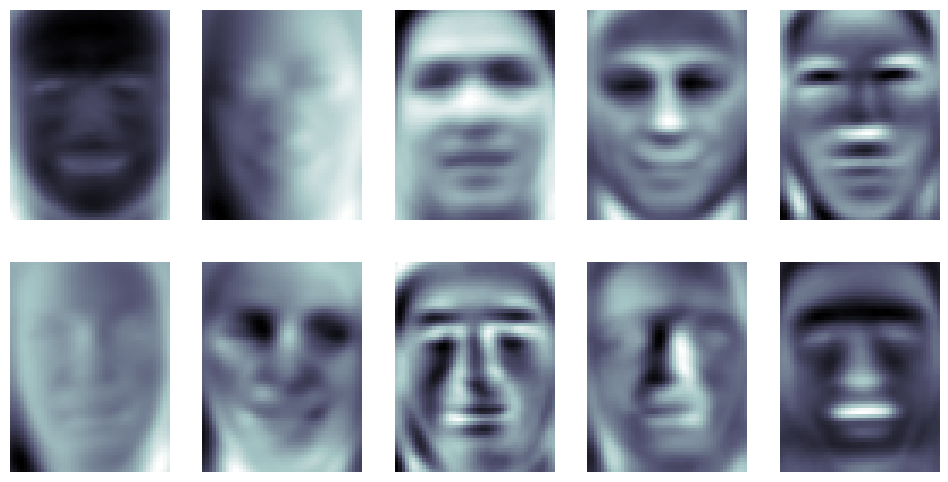

In [16]:
#Mostramos dichos elementos de la base
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
data = list(sorted_base.keys())[0:10]
for i in range(0,10):
  imagen = pca.components_[data[i]].reshape(faces.images[0].shape)
  axes[i // 5, i % 5].imshow(imagen, cmap=plt.cm.bone)
  axes[i // 5, i % 5].axis('off')  

## Reconstrucción con la base

Para mostrar que este método funciona, vamos a reconstruir la imagen anterior a partir de sus pesos.





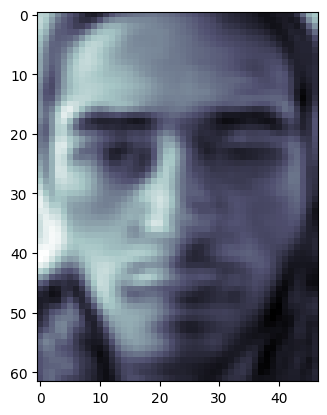

In [17]:
# Hacemos la reconstrucción con la proyección
for i in range(300):
  mean_face  = mean_face  + projection[i]*pca.components_[i]
imshow(mean_face.reshape(62,47),cmap=plt.cm.bone);

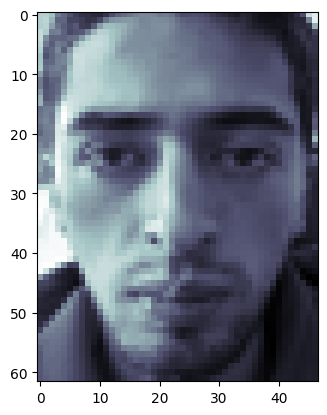

In [18]:
# La imágen original era 
imshow(np.asarray(image_numpy.reshape(62,47)),cmap=plt.cm.bone);